In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [38]:
#BCC Lattice
a = 1
R = np.array([[0,0,0],[0,0,1],[0,1,0],[1,0,0],[0,1,1],[1,0,1],[1,1,0],[1,1,1],[0.5,0.5,0.5]])*a
m = np.array([1,1,1,1,1,1,1,1,2])
colors = np.array(['r','r','r','r','r','r','r','r','b'])

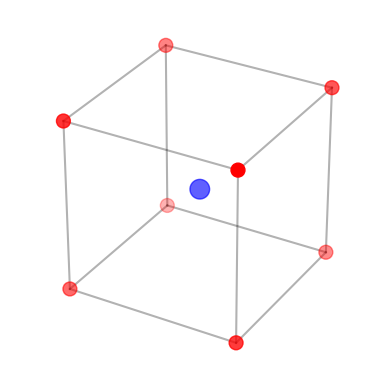

In [3]:
#Real Lattices
ax = plt.subplot(111, projection='3d')
ax.scatter(R[:,0], R[:,1], R[:,2], s=m*100, c=colors)
for i in range(len(R)):
    for j in range(i+1, len(R)):
        if np.linalg.norm(R[i]-R[j]) == 1:
            ax.plot([R[i,0],R[j,0]], [R[i,1],R[j,1]], [R[i,2],R[j,2]], c='k', alpha=0.3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [57]:
def vertex_from_atom_pairs(R_pairs):
    """
    Calculate the vertex from given atom pairs defining planes.
    Parameters:
        R_pairs (list of tuples): Each tuple contains two numpy arrays representing the coordinates of two atoms defining a plane.
        Returns:
        numpy array: The coordinates of the vertex where the planes intersect.
    """
    ABC = np.array([[]])
    D = np.array([])
    for Ra in R_pairs:
        P0 = (Ra[0]+Ra[1])/2
        N0 = Ra[1]-Ra[0]
        if ABC.size == 0:
            ABC= np.array([N0])
        else:
            ABC = np.vstack((ABC,np.array([N0])))
        D = np.append(D,np.dot(N0,P0))
    return np.linalg.solve(ABC,D)

In [79]:
R_NN = R[0:-1]
R_C = R[-1]
vert_arr = []
R_NNN = [R_C-np.array([1,0,0]), R_C-np.array([0,1,0]), R_C-np.array([0,0,1]),R_C+np.array([1,0,0]), R_C+np.array([0,1,0]), R_C+np.array([0,0,1])]
for Rn in R_NN:
    for Rnn1 in R_NNN:
        for Rnn2 in R_NNN:
            if not (np.array_equal(Rn,Rnn1) or np.array_equal(Rn,Rnn2) or np.array_equal(Rnn1,Rnn2)):
                try:
                    vert = vertex_from_atom_pairs([[R_C,Rn],[R_C,Rnn1],[R_C,Rnn2]])
                except:
                    continue
                if np.linalg.norm(vert-R_C) < np.linalg.norm(np.array([0.5,0.5,0.5])):
                    #print(np.linalg.norm(vert-R_C))
                    if vert.tolist() not in vert_arr:
                        vert_arr.append(vert.tolist())
print(f"Vertex {len(vert_arr)} found.")

Vertex 24 found.


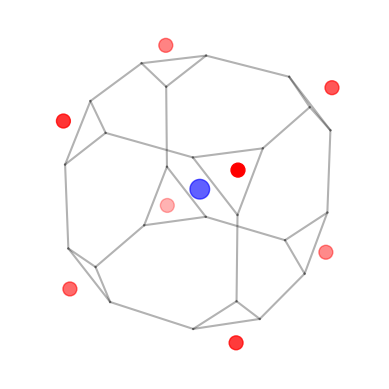

In [88]:
#Reciprocal Lattices
ax = plt.subplot(111, projection='3d')
ax.scatter(R[:,0], R[:,1], R[:,2], s=m*100, c=colors)
#for i in range(len(R)):
#    for j in range(i+1, len(R)):
#        if np.linalg.norm(R[i]-R[j]) == 1:
#            ax.plot([R[i,0],R[j,0]], [R[i,1],R[j,1]], [R[i,2],R[j,2]], c='k', alpha=0.3)

vertices = np.array(vert_arr)
#polygon = [vertices]
#poly = Poly3DCollection(polygon, alpha=0.5, facecolor='cyan', edgecolor='black')
#ax.add_collection3d(poly)

for i in range(len(vertices)):
    for j in range(i+1, len(vertices)):
        if np.linalg.norm(vertices[i]-vertices[j]) < 0.75:
            ax.plot([vertices[i,0],vertices[j,0]], [vertices[i,1],vertices[j,1]], [vertices[i,2],vertices[j,2]], c='k', alpha=0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [84]:
vertices.sort()